In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [3]:
bathym = dv.mbathy

In [4]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [5]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          ,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [6]:
p = p_list[1]
x,y,z = latlon_to_xyz(p[1],p[0])
print(x,y,z)

830.2672625246594 501.54775861623307 6296.725110611615


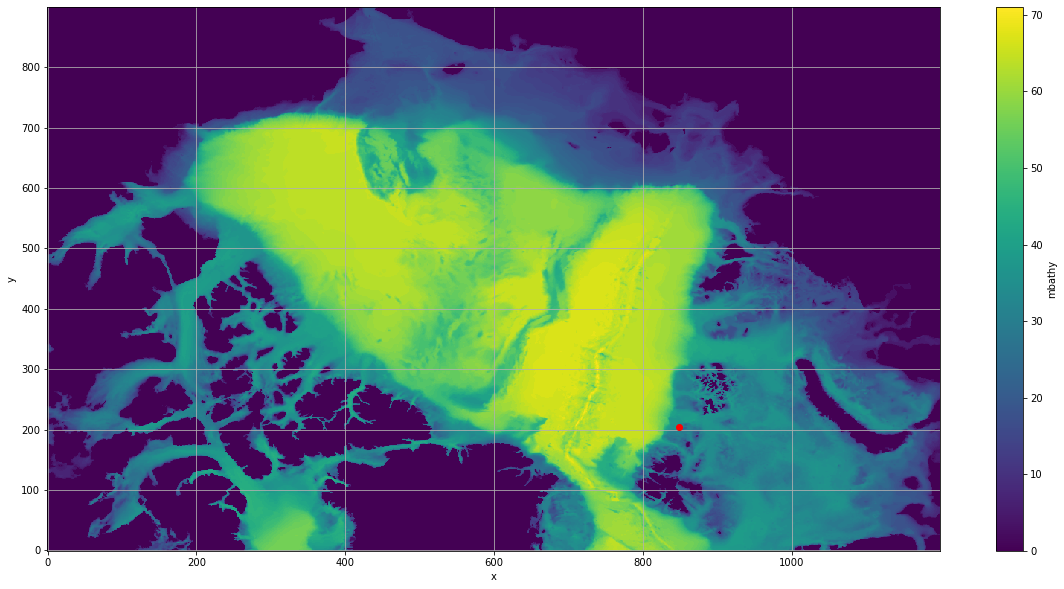

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
bathym.plot()
ax.plot(848, 204, marker='o', color='r')
ax.grid('on')

Deler inn i tre kart for hvert sted

In [8]:
# Barents sea

# Location for each mooring: 

- d13: latitude: 81◦24.202’N
       longitude: 31◦13.247’E
- d15: latitude: 81◦24.255’N
       longitude: 31◦13.533’E
- d17: latitude: 81◦24.587’N
       lonitude: 31◦14.506’E
- MB: latitude: 69 N 52.89
      longitude: 011E 11.89
- MW: latitude: 68 N 58.759
      longitude: 013E 16.845 
- MN: latitude: 68 N 56.109
      lonitude: 013E 19.866
- MS: latitude: 68 N 50.128
      longitude: 012E 45.082   
- y1: longitude: 79.37209
      lontitude: 5.57541
- y2: latitude: 80.03876
      longitude: 5.48733
- y3: latitude: 79.44093
      longitude: 5.56333


In [9]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          ,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

In [10]:
p = p_list[0]
p_lat = p[1]
p_lon = p[0]
p_lat

81.24202

In [11]:
bathym

<xarray.DataArray 'mbathy' (t: 1, y: 900, x: 1200)>
dask.array<xarray-mbathy, shape=(1, 900, 1200), dtype=int16, chunksize=(1, 900, 1200), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
Dimensions without coordinates: t, y, x

In [12]:
dzz

<xarray.Dataset>
Dimensions:       (t: 1, x: 1580, y: 1801, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables: (12/19)
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 75), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    e3w_1d        (t, z) float64 dask.array<chunksize=(1, 75), meta=np.ndarray>
    ...            ...
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(75,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    TimeStamp:  06/06/2019 11:16:36 +0200
    file_name:  mesh_zgr.nc

In [13]:
lat = bathym.nav_lat
lon = bathym.nav_lon

In [32]:
latnull = lat.values.flatten()
lonnull = lon.values.flatten()
lonnull = [np.mod(item+360,360) for item in lonnull]

In [15]:
lon.values

array([[ -89.1416  ,  -89.08634 ,  -89.03102 , ...,   42.00175 ,
          42.064854,   42.127846],
       [ -89.185974,  -89.13083 ,  -89.07562 , ...,   42.071568,
          42.134567,   42.197456],
       [ -89.23045 ,  -89.17542 ,  -89.12033 , ...,   42.14156 ,
          42.204456,   42.267242],
       ...,
       [-131.83008 , -131.90262 , -131.9752  , ...,  114.89426 ,
         114.81782 ,  114.74144 ],
       [-131.854   , -131.92659 , -131.99924 , ...,  114.93157 ,
         114.855095,  114.77868 ],
       [-131.87785 , -131.9505  , -132.02318 , ...,  114.968765,
         114.89225 ,  114.815796]], dtype=float32)

In [16]:
p_list = [(31.13247,81.24202),(31.13533,81.24255),(31.14506,81.24587)
          #,(011.1189, 69.5289),(013.16845,68.58759),(013.19866,68.56109),(012.45082,68.50128)
          ,(5.57541,79.37209),(5.48733,80.03876),(5.56333,79.44093)]

fig, ax = plt.subplots(figsize=(20,10))
bathym.plot()

for p in p_list:
    lat_v = p[1]
    lat_value = [min(latnull, key=lambda x:abs(x-h)) for h in [lat_v]]
    idx = np.where(lat.values==lat_value)
    ax.plot(848, 204, marker='o', color='r')

In [17]:
lat_value = [min(latnull, key=lambda x:abs(x-h)) for h in [morlat1, morlat2, morlat3]]

NameError: name 'morlat1' is not defined

In [33]:
lat_value = [min(latnull, key=lambda x:abs(x-h)) for h in [p[1]]]
lon_value = [min(lonnull, key=lambda x:abs(x-h)) for h in [p[0]]]

In [ ]:
diff_lat = 

In [34]:
print('lat value closest to point ', p[1],'is ', lat_value)
print('lon value closest to point ', p[0],'is ', lon_value)

lat value closest to point  81.24202 is  [81.24196]
lon value closest to point  31.13247 is  [31.132612228393555]


In [38]:
idx_lat = np.where(lat.values==lat_value)
idx_lon = np.where(lon.values==lon_value)
print('index for lat :', idx_lat)
print('index for lon :', idx_lon)
print('---------------------------')
print('lat values: ', lat[idx_lat].values)
print('lon values with lat idx: ', lon[idx_lat].values)
print('---------------------------')
print('lon values: ', lon[idx_lon].values)
print('lat values with lon idx: ', lat[idx_lon].values)
print('-----------------------------')
print('---------------------------')


index for lat : (array([123, 567]), array([584, 584]))
index for lon : (array([4]), array([1045]))
---------------------------
lat values:  [[81.24196 81.24196]
 [81.24196 81.24196]]
lon values with lat idx:  [[ -37.125473  -37.125473]
 [-176.87453  -176.87453 ]]
---------------------------
lon values:  [[31.132612]]
lat values with lon idx:  [[69.991394]]
-----------------------------
---------------------------


In [41]:
lat[0:100,0:100].values
'økner neddover --> vil finne row (rekke)'

array([[65.65805 , 65.67766 , 65.69729 , ..., 67.64953 , 67.6708  ,
        67.69208 ],
       [65.679245, 65.698875, 65.71853 , ..., 67.6732  , 67.6945  ,
        67.71581 ],
       [65.70039 , 65.72004 , 65.73972 , ..., 67.69682 , 67.71815 ,
        67.73949 ],
       ...,
       [67.4491  , 67.470566, 67.49207 , ..., 69.65444 , 69.67827 ,
        69.70212 ],
       [67.46458 , 67.48607 , 67.50759 , ..., 69.671814, 69.69567 ,
        69.71954 ],
       [67.479996, 67.5015  , 67.52304 , ..., 69.68912 , 69.71299 ,
        69.736885]], dtype=float32)

In [47]:
lat[584,:].values

array([67.58613 , 67.607735, 67.62939 , ..., 67.791916, 67.75831 ,
       67.7247  ], dtype=float32)

In [56]:
idx_l = []
diff_lon = []
lon = []
for i,item in enumerate(lonnull):
    d = item - p[0]
    if abs(d)<0.5:
        idx_l.append(i) 
        diff_lon.append(d) 
        lon.append(item)

In [61]:
diff_lonlat = []
diff_lat = []
idx_lat = []
for i in idx_l:
    d = latnull[i]-p[1]
    if abs(d)<1:
        diff_lonlat.append(d)
        diff_lat.append(latnull[i])
        idx_lat.append(i)

In [82]:
print(p[1])
print(diff_lat[97])
print(idx_lat[97])
print(latnull[idx_lat[97]])
print(np.where(lat.values==latnull[idx_lat[97]]))
i_lat = np.where(lat.values==latnull[idx_lat[97]])
#diff_lat[90:110]

81.24202
81.23906
227635
81.23906
(array([189, 501]), array([835, 835]))


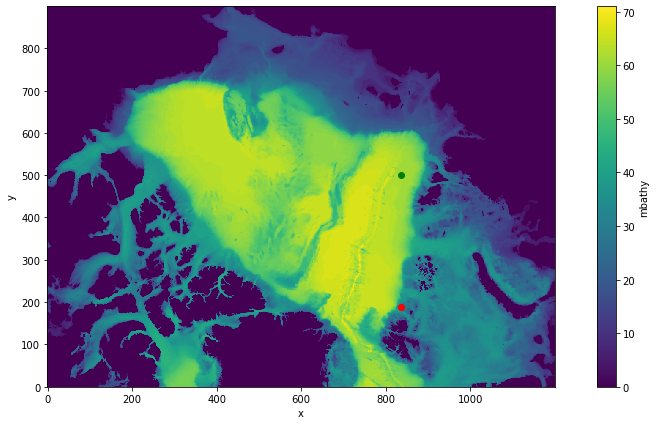

In [83]:
fig, ax = plt.subplots(figsize=(15,7))
bathym.plot()
ax.plot(i_lat[1][0],i_lat[0][0], marker='o', color='r')
ax.plot(i_lat[1][1],i_lat[0][1], marker='o', color='g')

'not sure whether np.where give x or y first.....'
#ax.plot(idx_lat[0][0],idx_lat[0][1], marker='o', color='y')
#ax.plot(idx_lat[1][0],idx_lat[1][1], marker='o', color='pink')

#ax.plot(idx_lon[1][0],idx_lon[0][0], marker='o', color='orange')
ax.set_aspect('equal')

In [21]:
'For the mooringsmap to get the depth as approximation for the bathymetry '
ds_rho = xr.open_dataset("https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/density/decav81B0/0.25/woa18_decav81B0_I00_04.nc",
                         decode_times=False
                        ).isel(time=0)

density = ds_rho.I_an.sel(lat=slice(67, 90), lon=slice(-180,180))

depth = density.idxmax(dim="depth", skipna=True)
depth = depth.drop_vars("time")

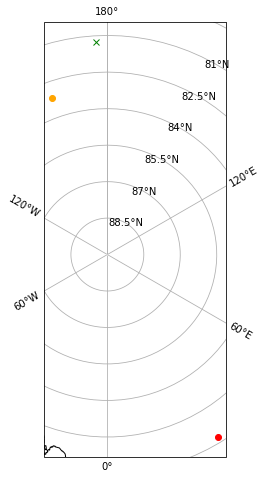

In [24]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(1, 1,
                       figsize=(10, 8),
                       subplot_kw={"projection" : ccrs.NorthPolarStereo()}
                      )
ax.coastlines()
ax.gridlines(lw=2, ec='black', draw_labels=True)

#c = ax.contourf(depth.lon, depth.lat, depth,
 #               transform=ccrs.PlateCarree(),
 #               #colors="black",
 #               #levels=5,
 #               cmap="Blues"
 #               )
ax.plot(p[0],p[1],marker='o', color='r',transform=ccrs.PlateCarree())
ax.plot(lon[567,584].values,lat[567,584].values,marker='x', color='g',transform=ccrs.PlateCarree())
ax.plot(-160.44263,83.18452,marker='o', color='orange',transform=ccrs.PlateCarree())
#fig.colorbar(c,
#             shrink=1,
#             label=r"Depth [m]"
#            )

In [26]:
print(lat[567,584].values)
lon[567,584].values

81.24196


array(-176.87453, dtype=float32)

## Tester om methoden funker for et punkt (500,550): 
- OK

In [277]:
# Tester også for p 500,550
print('lat values: ', lat[500,550].values)
print('---------------------------')
print('lon values: ', lon[500,550].values)

lat values:  83.18452
---------------------------
lon values:  -160.44263


In [258]:
idx_lat = np.where(lat.values==83.18452)
idx_lon = np.where(lon.values==-160.44263)
print('lat values: ', lat[idx_lat].values)
print('---------------------------')
print('lon values: ', lon[idx_lon].values)
print('OK, Ser at dette funker riktig for dette punktet')

lat values:  [[83.18452 83.18452]
 [83.18452 83.18452]]
---------------------------
lon values:  [[-160.44263]]
OK, Ser at dette funker riktig for dette punktet


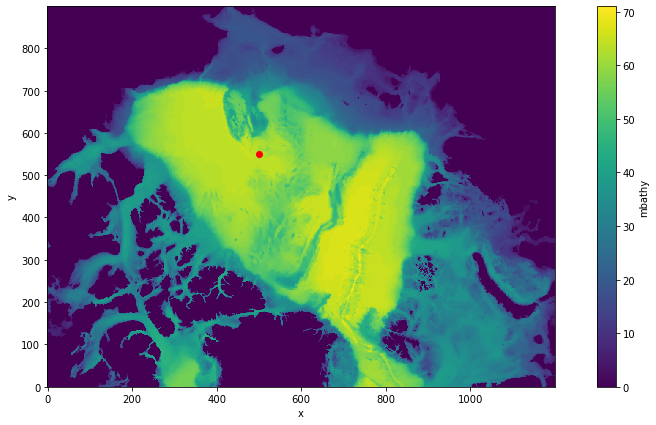

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
bathym.plot()
ax.plot(500,550, marker='o', color='r')
ax.set_aspect('equal')

In [30]:
#bathym = bathym.squeeze(axis=0)

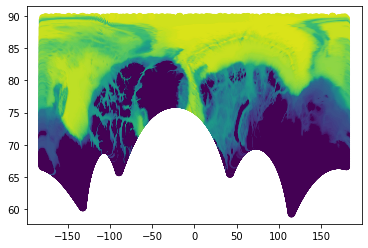

In [40]:
plt.figure(); plt.scatter(lon.values, lat.values, c=bathym.values)